In [6]:
import matplotlib.pyplot as plt
import mglearn
import mglearn.datasets



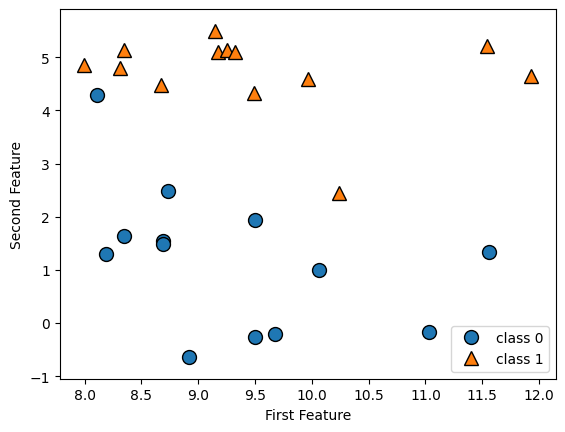

In [7]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0","class 1"],loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.show()